In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
sns.set_context("notebook")

In [14]:
def opt_func(value):
    return np.sqrt((value ** 2).sum())

In [15]:
def gen_frogs(frogs, dimension, sigma, mu):
    return sigma * (np.random.randn(frogs, dimension)) + mu

In [16]:
def sort_frogs(frogs, mplx_no, opt_func):
    # Find fitness of each frog
    fitness = np.array(list(map(opt_func, frogs)))
    # Sort the indices in decending order by fitness
    sorted_fitness = np.argsort(fitness)
    # Empty holder for memeplexes
    memeplexes = np.zeros((mplx_no, int(frogs.shape[0]/mplx_no)))
    # Sort into memeplexes
    for j in range(memeplexes.shape[1]):
        for i in range(mplx_no):
            memeplexes[i, j] = sorted_fitness[i+(mplx_no*j)]
    return memeplexes

In [17]:
def local_search(frogs, memeplex, opt_func, sigma, mu):
    # Select worst, best, greatest frogs
    frog_w = frogs[int(memeplex[-1])]
    frog_b = frogs[int(memeplex[0])]
    frog_g = frogs[0]
    # Move worst wrt best frog
    frog_w_new = frog_w + (np.random.rand() * (frog_b - frog_w))
    # If change not better, move worst wrt greatest frog
    if opt_func(frog_w_new) > opt_func(frog_w):
        frog_w_new = frog_w + (np.random.rand() * (frog_g - frog_w))
    # If change not better, random new worst frog
    if opt_func(frog_w_new) > opt_func(frog_w):
        frog_w_new = gen_frogs(1, frogs.shape[1], sigma, mu)[0]
    # Replace worst frog
    frogs[int(memeplex[-1])] = frog_w_new
    return frogs

In [18]:
def shuffle_memeplexes(frogs, memeplexes):
    # Flatten the array
    temp = memeplexes.flatten()
    #Shuffle the array
    np.random.shuffle(temp)
    # Reshape
    temp = temp.reshape((memeplexes.shape[0], memeplexes.shape[1]))
    return temp

In [19]:
def sfla(opt_func, frogs=30, dimension=2, sigma=1, mu=0, mplx_no=5, mplx_iters=10, solun_iters=50):
    # Generate frogs around the solution
    frogs = gen_frogs(frogs, dimension, sigma, mu)
    # Arrange frogs and sort into memeplexes
    memeplexes = sort_frogs(frogs, mplx_no, opt_func)
    # Best solution as greatest frog
    best_solun = frogs[int(memeplexes[0, 0])]
    # For the number of iterations
    for i in range(solun_iters):
        # Shuffle memeplexes
        memeplexes = shuffle_memeplexes(frogs, memeplexes)
        # For each memeplex
        for mplx_idx, memeplex in enumerate(memeplexes):
            # For number of memeplex iterations
            for j in range(mplx_iters):
                # Perform local search
                frogs = local_search(frogs, memeplex, opt_func, sigma, mu)
            # Rearrange memeplexes
            memeplexes = sort_frogs(frogs, mplx_no, opt_func)
            # Check and select new best frog as the greatest frog
            new_best_solun = frogs[int(memeplexes[0, 0])]
            if opt_func(new_best_solun) < opt_func(best_solun):
                best_solun = new_best_solun
    return best_solun, frogs, memeplexes.astype(int)

In [20]:
def main():
    # Run algorithm
    solun, frogs, memeplexes = sfla(opt_func, 100, 2, 1, 0, 5, 25, 50)
    print("Optimal Solution (closest to zero): {}".format(solun))
    # Place memeplexes
    for idx, memeplex in enumerate(memeplexes):
        plt.scatter(frogs[memeplex, 0], frogs[memeplex, 1], marker='x', label="memeplex {}".format(idx))
    plt.scatter(solun[0], solun[1], marker='o', label="Optimal Solution")
    plt.scatter(0, 0, marker='*', label='Actual Solution')
    # Plot properties
    plt.legend()
    plt.xlabel("x-axis")
    plt.ylabel("y-axis")
    plt.title("Shuffled Frogs")
    # Show plot
    plt.show()

Optimal Solution (closest to zero): [-0.11822164 -0.13900913]


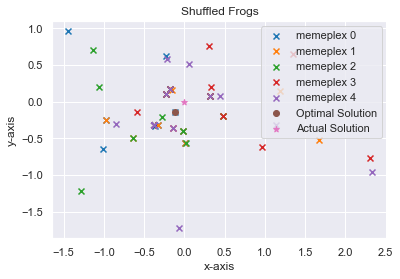

In [21]:
if __name__ == '__main__':
    main()